In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [ ]:
# Loading the dataset
data = pd.read_csv('LoanData_Preprocessed_v1.1.csv')

In [ ]:
# Descriptive Statistics
desc_stats = data.describe()
print("Descriptive Statistics:\n", desc_stats)

Descriptive Statistics:
               age      employ     address     income     debtinc    creddebt  \
count  680.000000  700.000000  700.000000  663.00000  700.000000  700.000000   
mean    34.750000    8.388571    8.268571   45.74359   10.260571    1.553553   
std      7.973215    6.658039    6.821609   37.44108    6.827234    2.117197   
min     20.000000    0.000000    0.000000   14.00000    0.400000    0.011696   
25%     28.000000    3.000000    3.000000   24.00000    5.000000    0.369059   
50%     34.000000    7.000000    7.000000   34.00000    8.600000    0.854869   
75%     40.000000   12.000000   12.000000   54.50000   14.125000    1.901955   
max     56.000000   31.000000   34.000000  446.00000   41.300000   20.561310   

          othdebt          ed     default  
count  700.000000  680.000000  700.000000  
mean     3.058209    1.717647    0.261429  
std      3.287555    0.925652    0.439727  
min      0.045584    1.000000    0.000000  
25%      1.044178    1.000000    0

In [ ]:
# Imputation numerical columns with the mean
num_cols = ['age', 'income', 'ed']
imputer_mean = SimpleImputer(strategy='mean')
data[num_cols] = imputer_mean.fit_transform(data[num_cols])

In [ ]:
# Correlation Matrix
corr_matrix = data.corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                age    employ   address    income   debtinc  creddebt  \
age       1.000000  0.539280  0.569669  0.470022  0.011009  0.301200   
employ    0.539280  1.000000  0.321031  0.603073 -0.031182  0.403694   
address   0.569669  0.321031  1.000000  0.308603  0.012352  0.209019   
income    0.470022  0.603073  0.308603  1.000000 -0.039652  0.561065   
debtinc   0.011009 -0.031182  0.012352 -0.039652  1.000000  0.501767   
creddebt  0.301200  0.403694  0.209019  0.561065  0.501767  1.000000   
othdebt   0.339166  0.406091  0.227020  0.583597  0.584870  0.633104   
ed        0.036643 -0.135622  0.057893  0.250262  0.028538  0.103680   
default  -0.137555 -0.282978 -0.163657 -0.074147  0.389575  0.244740   

           othdebt        ed   default  
age       0.339166  0.036643 -0.137555  
employ    0.406091 -0.135622 -0.282978  
address   0.227020  0.057893 -0.163657  
income    0.583597  0.250262 -0.074147  
debtinc   0.584870  0.028538  0.389575  
creddebt  0.

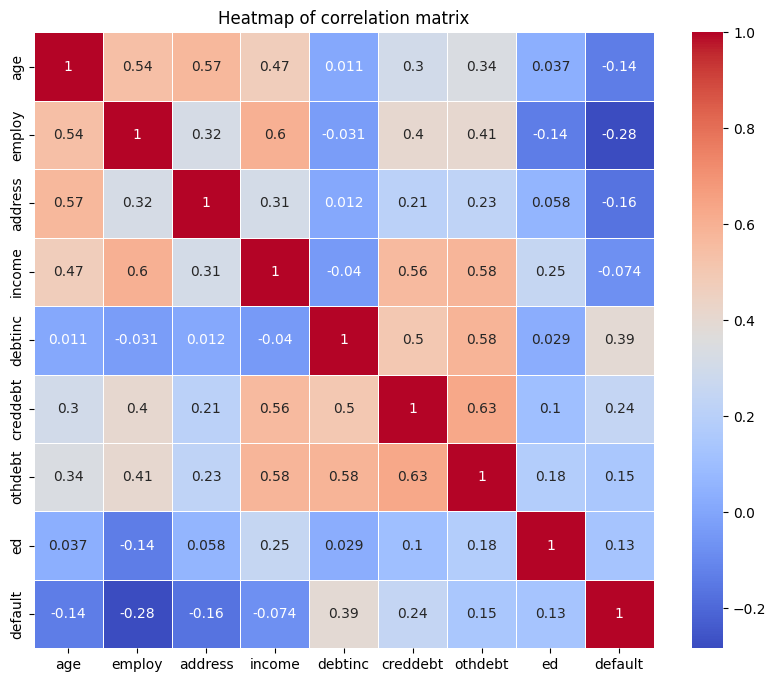

In [ ]:
# Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of correlation matrix')
plt.show()

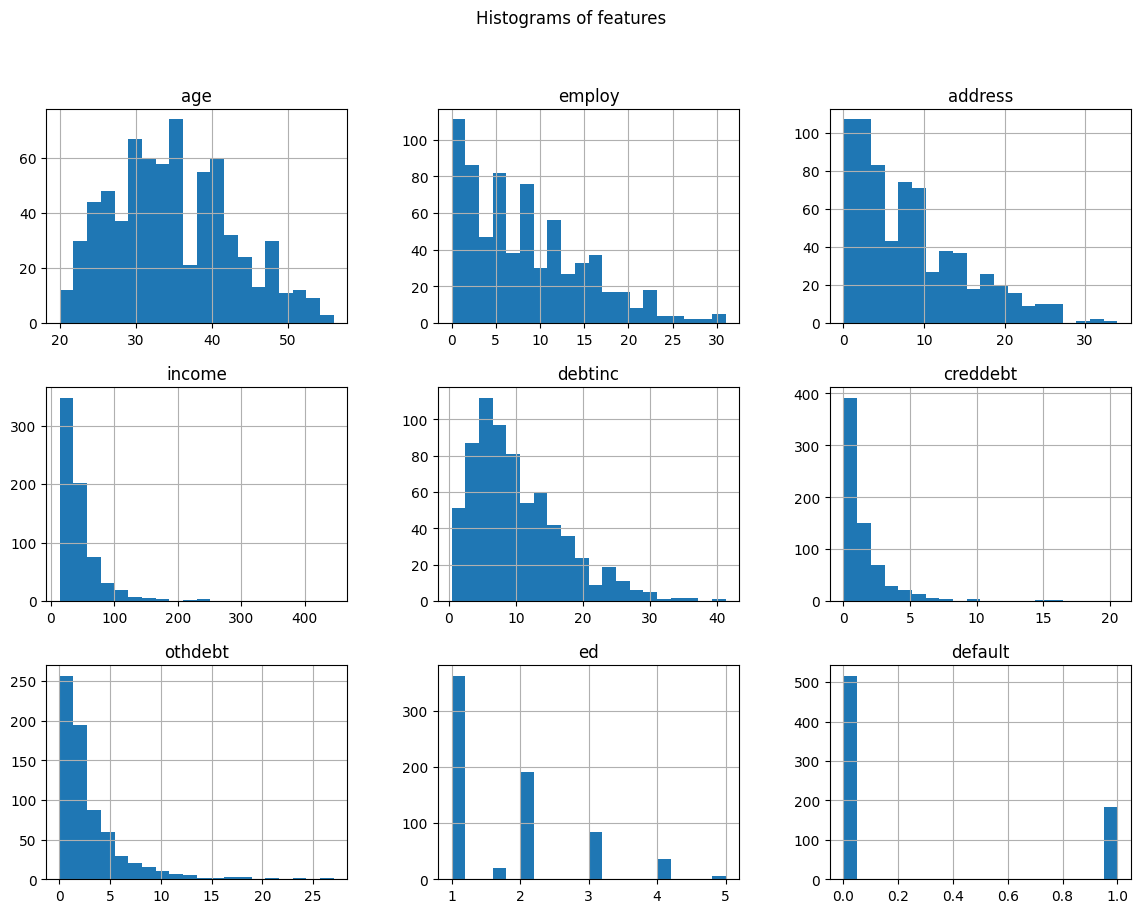

In [ ]:
# Histograms
data.hist(bins=20, figsize=(14, 10))
plt.suptitle('Histograms of features')
plt.show()

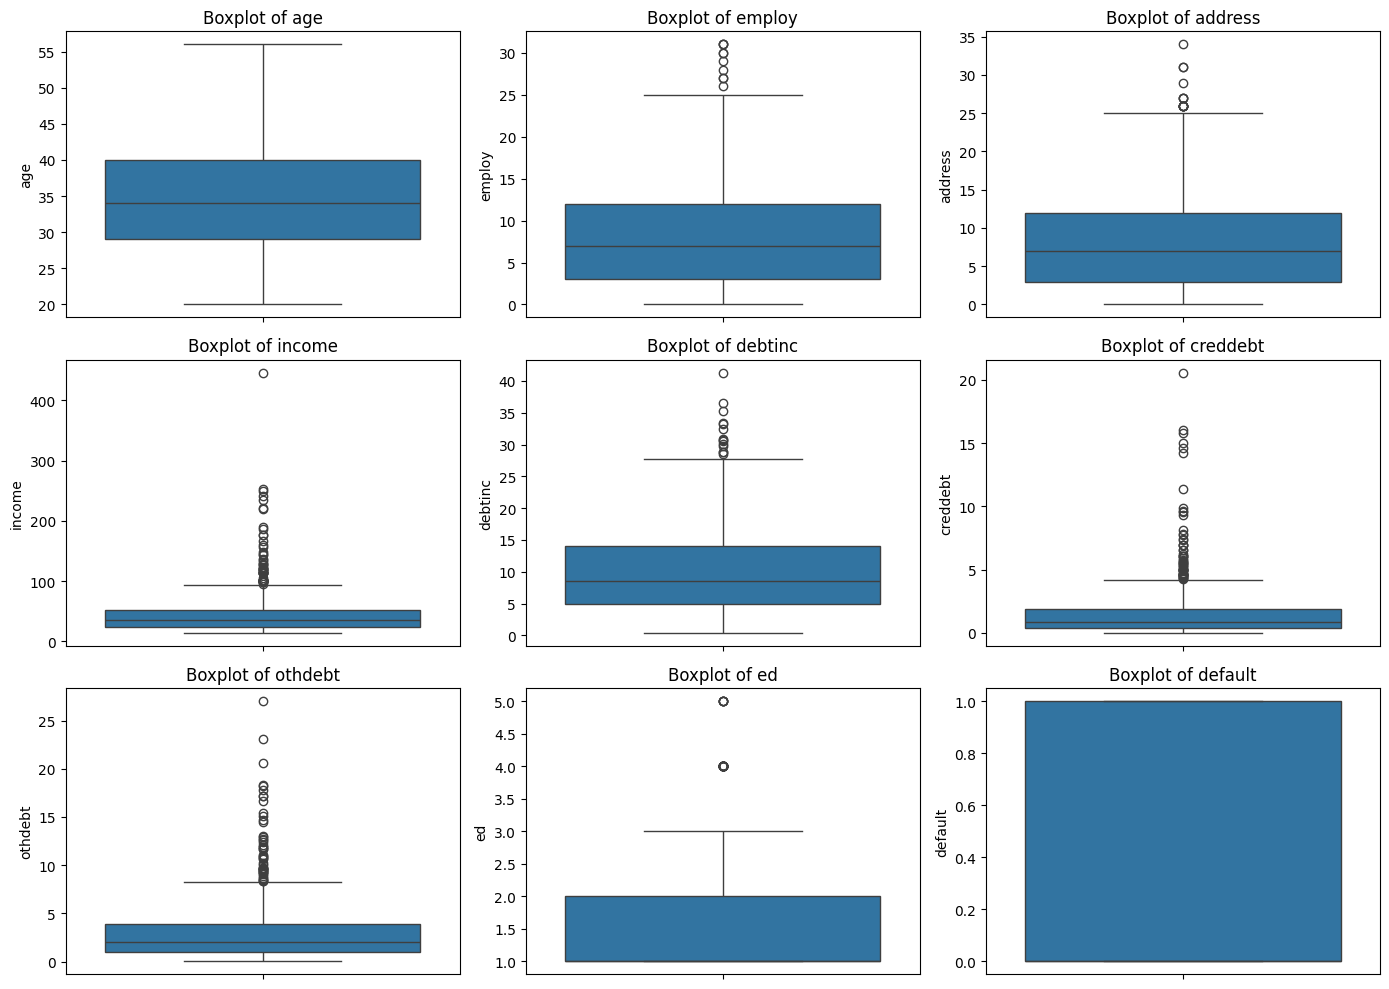

In [ ]:
# Box Plots
plt.figure(figsize=(14, 10))
for i, column in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

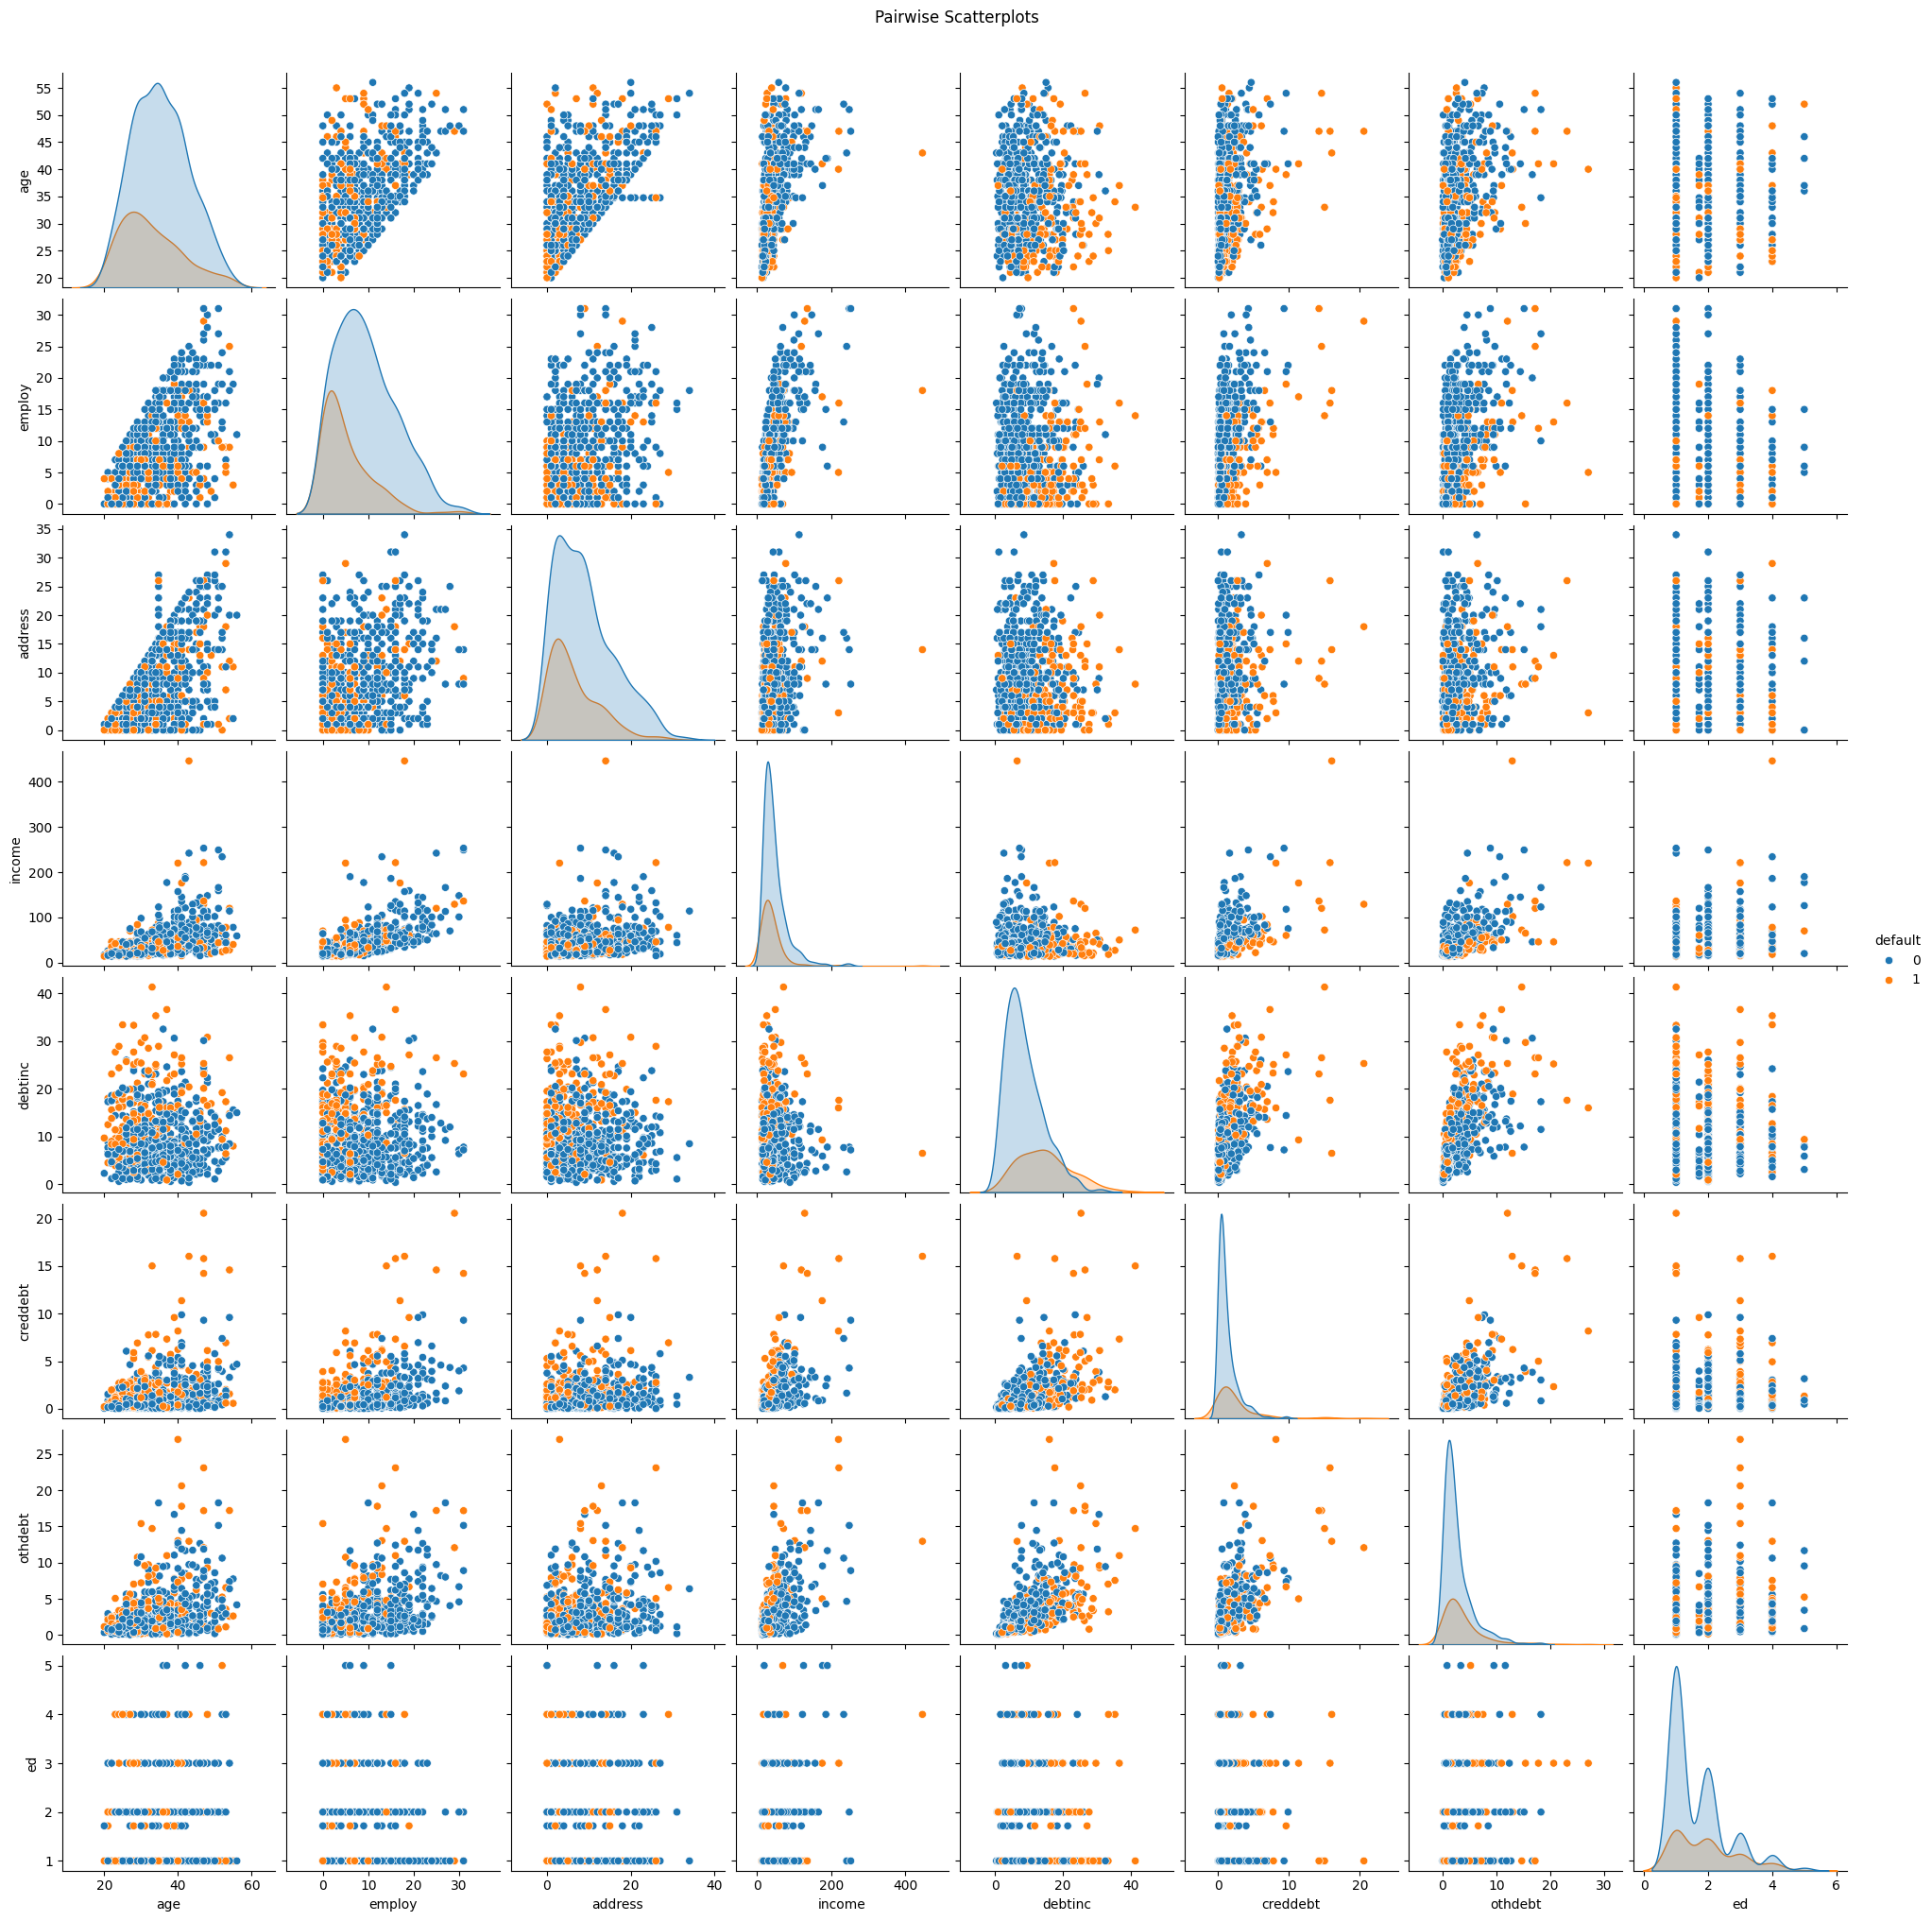

In [ ]:
# Scatter Plots
sns.pairplot(data, hue='default')
plt.suptitle('Pairwise Scatterplots', y=1.02)
plt.show()

In [ ]:
from scipy.stats import mannwhitneyu

# Mann-Whitney U Test for age between default and non-default groups
default_group = data[data['default'] == 1]['age'].dropna()
non_default_group = data[data['default'] == 0]['age'].dropna()

u_stat, p_val = mannwhitneyu(default_group, non_default_group)
print(f"Mann-Whitney U test results for age: U-statistic = {u_stat}, p-value = {p_val}")

Mann-Whitney U test results for age: U-statistic = 37628.0, p-value = 3.8014036636876617e-05


The p-value is below the significance level 0.05, the null hypothesis can be rejected and the alternative hyphothetsis thet the two groups are not equal can be accepted.

In [ ]:
# Logistic regression model
import statsmodels.api as sm
X = data[['age', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt', 'ed']].dropna()
y = data['default'].loc[X.index]

X = sm.add_constant(X)

logit_model = sm.Logit(y, X).fit()

print(logit_model.summary())


Optimization terminated successfully.
         Current function value: 0.393167
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      691
Method:                           MLE   Df Model:                            8
Date:                Wed, 07 Aug 2024   Pseudo R-squ.:                  0.3157
Time:                        09:13:45   Log-Likelihood:                -275.22
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.529e-50
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5855      0.617     -2.569      0.010      -2.795      -0.376
age            0.0341      0.

**Significant Predictors:**

* Age, employment years, years at the current address, debt-to-income
ratio, and credit card debt are significant predictors of loan default.
* The negative coefficients for employment years and years at the current address indicate that stability in job and residence decreases the likelihood of default.
* Positive coefficients for age, debt-to-income ratio, and credit card debt suggest that higher values in these variables increase the likelihood of default.


**Non-significant Predictors:**

* Income, other debt, and education level are not significant predictors, as their p-values are above the common significance thresholds